# Handling FITS files using Python

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
import os

#File directory
file_dir = 'C:/Users/egeki/Desktop/ATASAM/M42'
#Fits files
fits_files = ['frame-u-006073-4-0063.fits','frame-g-006073-4-0063.fits','frame-r-006073-4-0063.fits']
#Creating a full path
fits_path = [os.path.join(file_dir, fits) for fits in fits_files]

#Opening fits files
M42u = fits.open(fits_path[0]) #UV
M42g = fits.open(fits_path[1]) #Green
M42r = fits.open(fits_path[2]) #Red

#print(M42[0].header)

u_data = M42u[0].data

Image

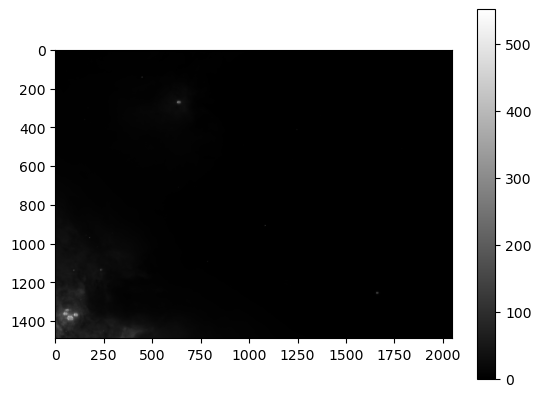

In [3]:
plt.imshow(u_data, cmap = 'gray') 
plt.colorbar()

Pixel Histogram

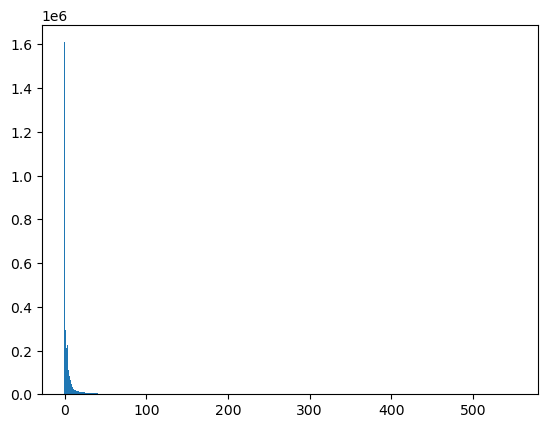

In [4]:
hist = plt.hist(u_data.flat,bins=500) #creates a pixel histogram with a flattened array
plt.show()
#pixel value vs brightness value

Image on Log Scale

[Text(1, 5000.0, '5'), Text(1, 10000.0, '10'), Text(1, 20000.0, '20')]

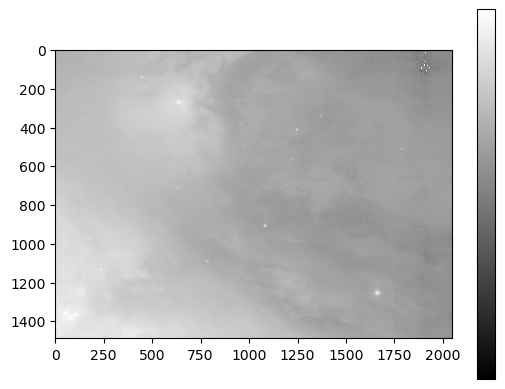

In [5]:
plt.imshow(u_data, cmap='gray', norm=LogNorm())
#Color values
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5','10','20'])

Colorisation

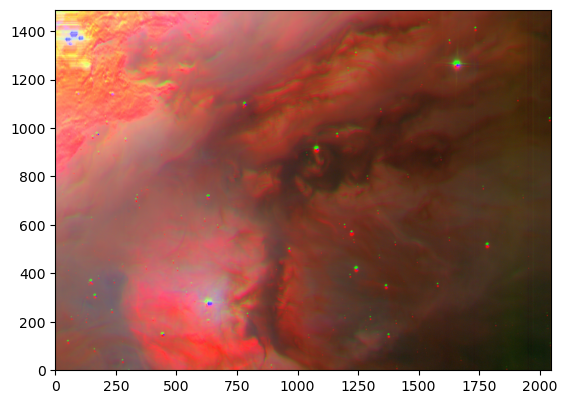

In [10]:
from astropy.visualization import make_lupton_rgb

g_data = M42g[0].data
r_data = M42r[0].data
u_data = M42u[0].data

#Create a RGB image from r,g,u data
rgb_default = make_lupton_rgb(r_data,g_data,u_data,stretch=1.5,Q=10) 
plt.imshow(rgb_default,origin='lower')
plt.show()

Units and Coordinates

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree)
#or
c = SkyCoord(10.625,41.2, unit='deg')
#or
c = SkyCoord('00h42m30s','+41d12m00s')
#or
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle,u.deg))
#or
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle,u.deg))

c.ra #for only ra value
c.ra.hour #ra to hour
c.dec #for only dec value
c.dec.radian #dec to radian

c.galactic #galactic coordinate system (l,b)
c.transform_to('fk5') #transforms to fk5 catalogue